In [16]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# 1. Load all transfer function files (z1, z2, ...)
files = sorted(glob("output/transfer00_z*_pk.dat"))

k_vals = []
eta_vals = []
delta_gamma = []

for f in files:
    data = np.loadtxt(f)
    if len(k_vals) == 0:
        k_vals = data[:, 0]
    eta = data[0, 1]  # All rows in this file correspond to same eta
    eta_vals.append(eta)
    delta_gamma.append(np.abs(data[:, 1]))  # Second column is the transfer function

# Convert to numpy arrays
eta_vals = np.array(eta_vals)
k_vals = np.array(k_vals)
delta_gamma = np.array(delta_gamma).T  # shape: (n_k, n_eta)

# Sort η in increasing order
sort_idx = np.argsort(eta_vals)
eta_vals = eta_vals[sort_idx]
delta_gamma = delta_gamma[:, sort_idx]


# Turn into meshgrid for 2D plotting
K, ETA = np.meshgrid(np.log10(k_vals), np.log10(eta_vals), indexing='ij')

plt.figure(figsize=(8, 6))
plt.pcolormesh(K, ETA, delta_gamma, shading='auto', cmap='Greys')
plt.xlabel(r'$\log_{10}(k\,[\mathrm{Mpc}^{-1}])$')
plt.ylabel(r'$\log_{10}(\eta\,[\mathrm{Mpc}])$')
plt.colorbar(label=r'$|\delta_\gamma(k,\eta)|$')
plt.title("Photon Density Transfer Function")
plt.savefig("Heat_map")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Load all transfer files
files = sorted(glob("output/transfer*_z*_pk.dat"))
k_vals = []
eta_vals = []
delta_gamma = []

for f in files:
    data = np.loadtxt(f)
    if len(k_vals) == 0:
        k_vals = data[:, 0]
    eta = data[0, 1]
    eta_vals.append(eta)
    delta_gamma.append(np.abs(data[:, 1]))

# Convert and sort
eta_vals = np.array(eta_vals)
k_vals = np.array(k_vals)
delta_gamma = np.array(delta_gamma).T

# Sort eta
sort_idx = np.argsort(eta_vals)
eta_vals = eta_vals[sort_idx]
delta_gamma = delta_gamma[:, sort_idx]

# Make mesh
K, ETA = np.meshgrid(np.log10(k_vals), np.log10(eta_vals), indexing='ij')

# Plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(K, ETA, delta_gamma, shading='auto', cmap='Greys')
plt.xlabel(r'$\log_{10}(k\, [\mathrm{Mpc}^{-1}])$')
plt.ylabel(r'$\log_{10}(\eta\, [\mathrm{Mpc}])$')
plt.colorbar(label=r'$|\delta_\gamma(k,\eta)|$')
plt.title("Photon Density Transfer Function")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

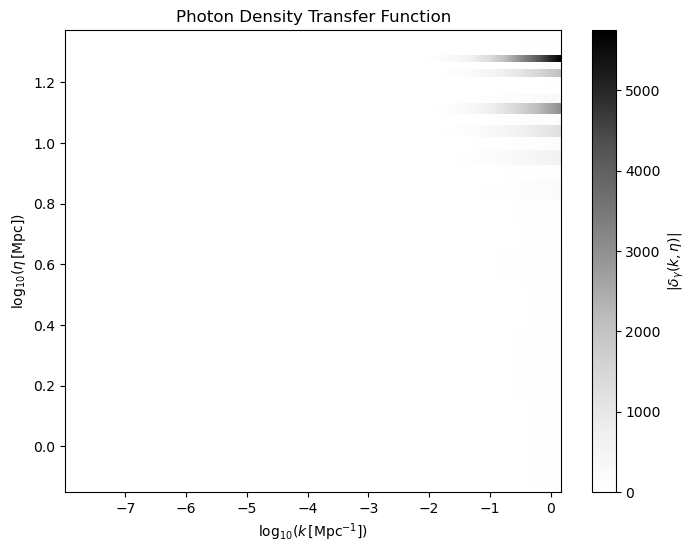

In [33]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

files = sorted(glob("output/transfer*_z*_tk.dat"))
eta_vals = []
delta_gamma_list = []
k_vals_set = False

for f in files:
    try:
        data = np.loadtxt(f)
        if data.ndim != 2 or data.shape[1] < 4:
            print(f"Skipping {f}, not enough columns.")
            continue
        eta = float(f.split("_z")[1].split("_")[0])  # crude z extraction from filename
        eta_vals.append(eta)
        delta_gamma_list.append(np.abs(data[:, 3]))  # Column 4 is δ_γ
        if not k_vals_set:
            k_vals = data[:, 0]
            k_vals_set = True
    except Exception as e:
        print(f"Error loading {f}: {e}")

# Convert
eta_vals = np.array(eta_vals)
delta_gamma_list.append(np.abs(data[:, 3]) / np.max(np.abs(data[:, 3])))

# Sort
sort_idx = np.argsort(eta_vals)
eta_vals = eta_vals[sort_idx]
delta_gamma = delta_gamma[:, sort_idx]

# Plot
K, ETA = np.meshgrid(np.log10(k_vals), np.log10(eta_vals), indexing='ij')
plt.figure(figsize=(8, 6))
plt.pcolormesh(K, ETA, delta_gamma, shading='auto', cmap='Greys')
plt.xlabel(r'$\log_{10}(k\, [\mathrm{Mpc}^{-1}])$')
plt.ylabel(r'$\log_{10}(\eta\, [\mathrm{Mpc}])$')
plt.colorbar(label=r'$|\delta_\gamma(k,\eta)|$')
plt.title("Photon Density Transfer Function")
plt.savefig("Attempt3")